In [1]:
import numpy as np
import csv
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.utils.data as Data
import torchvision

In [2]:
from sklearn.model_selection import train_test_split
 #首先，读取.CSV文件成矩阵的形式。
my_matrix = np.loadtxt(open("results.csv"),delimiter=",",skiprows=0)
#print(my_matrix)
 #对于矩阵而言，将矩阵倒数第一列之前的数值给了X（输入数据），将矩阵大最后一列的数值给了y（标签）
#X, y = my_matrix[:,:-1],my_matrix[:,-1]
 #利用train_test_split方法，将X,y随机划分问，训练集（X_train），训练集标签（X_test），测试卷（y_train），
 #测试集标签（y_test），安训练集：测试集=7:3的
 #概率划分，到此步骤，可以直接对数据进行处理
print(my_matrix.shape)
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 #此步骤，是为了将训练集与数据集的数据分别保存为CSV文件
 #np.column_stack将两个矩阵进行组合连接
train= np.column_stack((X_train,y_train))
 #numpy.savetxt 将txt文件保存为.csv结尾的文件
np.savetxt('train_usual.csv',train, delimiter = ',')
test = np.column_stack((X_test, y_test))
np.savetxt('test_usual.csv', test, delimiter = ',')
'''

(1139, 1201)


"\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n #此步骤，是为了将训练集与数据集的数据分别保存为CSV文件\n #np.column_stack将两个矩阵进行组合连接\ntrain= np.column_stack((X_train,y_train))\n #numpy.savetxt 将txt文件保存为.csv结尾的文件\nnp.savetxt('train_usual.csv',train, delimiter = ',')\ntest = np.column_stack((X_test, y_test))\nnp.savetxt('test_usual.csv', test, delimiter = ',')\n"

In [3]:
data0 =my_matrix[:150]
data1 =my_matrix[150:300]
data2 =my_matrix[300:402]
data3 =my_matrix[402:539]
data4 =my_matrix[539:689]
data5 =my_matrix[689:839]
data6 =my_matrix[839:989]
data7 =my_matrix[989:1139]


In [4]:
data00 = data0[:50]
data01 = data0[50:100]
data02 = data0[100:]
data10 = data1[:50]
data11 = data1[50:100]
data12 = data1[100:]
data20 = data2[:50]
data21 = data2[50:100]
data22 = data2[100:]
data30 = data3[:33]
data31 = data3[33:66]
data32 = data3[66:99]
data40 = data4[:40]
data41 = data4[40:80]
data42 = data4[80:120]
data50 = data5[:50]
data51 = data5[50:100]
data52 = data5[100:]
data60 = data6[:50]
data61 = data6[50:100]
data62 = data6[100:]
data70 = data7[:50]
data71 = data7[50:100]
data72 = data7[100:]

In [5]:
datab0 = np.vstack((data00,data10,data20,data30,data40,data50,data60,data70))
datab1 = np.vstack((data01,data11,data21,data31,data41,data51,data61,data71))
datab2 = np.vstack((data02,data12,data22,data32,data42,data52,data62,data72))

#datab0t = np.vstack((data00t,data10t,data20t,data30t,data40t,data50t,data60t,data70t))
#datab1t = np.vstack((data01t,data11t,data21t,data31t,data41t,data51t,data61t,data71t))
#datab2t = np.vstack((data02t,data12t,data22t,data32t,data42t,data52t,data62t,data72t))


print(datab2)

[[2.53375282e-02 2.89133321e-02 3.39952158e-02 ... 1.56704908e-02
  1.99782715e-02 0.00000000e+00]
 [5.88798866e-02 5.74962160e-02 4.76538705e-02 ... 2.72316495e-02
  2.52601589e-02 0.00000000e+00]
 [4.64673025e-02 4.87694369e-02 4.11774291e-02 ... 5.80559149e-03
  4.77172447e-03 0.00000000e+00]
 ...
 [5.51126081e-02 5.07795693e-02 4.96675108e-02 ... 2.50315444e-02
  2.41013159e-02 7.00000000e+00]
 [1.57849159e-02 2.26311407e-02 2.83054937e-02 ... 1.32970418e-02
  1.80799100e-02 7.00000000e+00]
 [1.88137476e-02 1.45880472e-02 1.21730603e-02 ... 6.55943832e-03
  8.27603504e-03 7.00000000e+00]]


In [6]:
#times1


train = np.vstack((datab1,datab2))
test = datab0


In [7]:
#datab1 = np.array(datab0).reshape(1,374)
#print(datab1)


X_train, y_train = train[:,:-1],train[:,-1]
X_test, y_test = test[:,:-1],test[:,-1]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(y_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7.

In [8]:
torch_x = torch.from_numpy(X_train)
torch_y = torch.from_numpy(y_train)
test_x = torch.from_numpy(X_test)
test_y = torch.from_numpy(y_test)
y_train = torch.tensor(torch_y, dtype=torch.long)
y_test = torch.tensor(test_y,dtype = torch.long)
x_test = torch.tensor(test_x , dtype=torch.float32)
x_train = torch.tensor(torch_x, dtype=torch.float32)


#x_train = torch.tensor(torch_x, dtype=torch.float32)

#y_train = torch_y.reshape(torch_y.shape[0], 1)
#x,y = Variable(x_train),Variable(y_train)


D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
D:\softwares\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sou

In [9]:
print(x_train.shape, x_test.shape)

torch.Size([698, 1200]) torch.Size([373, 1200])


In [10]:
#Hyper parameters
EPOCH = 50
BATCH_SIZE = 50
LR = 0.001


In [11]:
x_test = x_test.reshape(x_test.shape[0], 20,60)
x_train = x_train.reshape(x_train.shape[0], 20,60)
torch_dataset = Data.TensorDataset(x_train,y_train )
train_loader = Data.DataLoader(dataset= torch_dataset, batch_size=BATCH_SIZE, shuffle=True,num_workers=2)


In [12]:
#print(x_train, x_test)

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv1d(
                in_channels=20,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                                            # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool1d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv1d(16, 32, 5, 1),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool1d(2),                # output shape (32, 7, 7)
        )

        self.out = nn.Linear(32 * 12, 8)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        
        
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

In [14]:
cnn = CNN()
optimizer = torch.optim.Adam(cnn.parameters(), lr = LR)
loss_func = torch.nn.CrossEntropyLoss()

In [15]:
ACC = []
Loss_CNN = []
Times = []
times = 0
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
        b_x = Variable(x)   # batch x
        b_y = Variable(y)   # batch y

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients
        Loss_CNN.append(loss.data)
        times += 1
        Times.append(times)
        #print(times)

        if step % 50 == 0:
            train_output, last_layer = cnn(x_train)
            pred_y = torch.max(train_output, 1)[1].data.squeeze()
            accuracy = (pred_y == y_train).sum().item() / float(y_train.size(0))
            print('epoch:'+ str(epoch) + 'loss:'+ str(loss)+'|train accuracy:' + str(accuracy) )
        
        test_output, last_layer = cnn(x_test)
        pred_y = torch.max(test_output, 1)[1].data.squeeze()
        test_output, last_layer = cnn(x_test)
        #pred_y = torch.max(test_output, 1)[1].data.squeeze()
        
        #print(y_test[100])
        num = [50,50,50,33,40,50,50,50]
        
        acc_list = []
        
        #y_test = y_test.numpy()
        #print(y_test[0:50])
        pred_y = pred_y.numpy()
        #print(pred_y[0:50])
        for i in num:
            round_ = 0
            times_ = 0
            for j in range(i):
                
                if pred_y[round_ + j] == y_test[round_ + j]:
                    times_ += 1
            #print(times)
            acc_list.append( times_ / i  )
            
            round_ += i
        
        #print(acc_list)
        final = 0
        
        for i in acc_list:
            final += i
        final = final / 8
        
        #print(final)
        #accuracy = (pred_y == y_test).sum().item() / float(y_test.size(0))
        ACC.append(final)
        if step % 50 == 0:
            print('|test accuracy:' + str(final))
            
        if final > 0.7 and accuracy> 0.7:
            break


            
            
            
            
    

epoch:0loss:tensor(2.0851, grad_fn=<NllLossBackward>)|train accuracy:0.14326647564469913
|test accuracy:0.0
epoch:1loss:tensor(2.0497, grad_fn=<NllLossBackward>)|train accuracy:0.1876790830945559
|test accuracy:1.0
epoch:2loss:tensor(1.9719, grad_fn=<NllLossBackward>)|train accuracy:0.40974212034383956
|test accuracy:1.0
epoch:3loss:tensor(1.8774, grad_fn=<NllLossBackward>)|train accuracy:0.497134670487106
|test accuracy:1.0
epoch:4loss:tensor(1.5651, grad_fn=<NllLossBackward>)|train accuracy:0.5100286532951289
|test accuracy:0.981875
epoch:5loss:tensor(1.3057, grad_fn=<NllLossBackward>)|train accuracy:0.5530085959885387
|test accuracy:0.8798863636363636
epoch:6loss:tensor(0.9561, grad_fn=<NllLossBackward>)|train accuracy:0.7048710601719198
|test accuracy:0.6114583333333332
epoch:7loss:tensor(0.9544, grad_fn=<NllLossBackward>)|train accuracy:0.7020057306590258
|test accuracy:0.7948484848484849
epoch:8loss:tensor(0.9713, grad_fn=<NllLossBackward>)|train accuracy:0.6876790830945558
|test

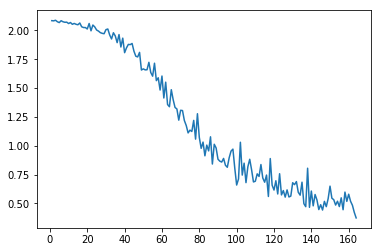

In [16]:
#print(Times)
#print()
plt.plot(Times,Loss_CNN)
plt.show()
#np.save('Loss_CNNfull.npy',Loss_CNN)
#np.save('acc_CNNfull.npy',ACC)

In [17]:
#datab0
test_output, last_layer = cnn(x_test)
pred_y = torch.max(test_output, 1)[1].data.squeeze()

print(y_test[100])
num = [50,50,50,33,40,50,50,50]

acc_list = []

#y_test = y_test.numpy()
print(y_test[0:50])
pred_y = pred_y.numpy()
print(pred_y[0:50])
for i in num:
    round_ = 0
    times = 0
    for j in range(i):
        
        if pred_y[round_ + j] == y_test[round_ + j]:
            times += 1
    print(times)
    acc_list.append( times / i  )
    
    round_ += i

print(acc_list)
final = 0

for i in acc_list:
    final += i
final = final / 8

print(final)

tensor(2)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 5 0 3
 5 0 0 0 0 0 0 0 0 5 0 0 0]
45
45
45
32
36
45
45
45
[0.9, 0.9, 0.9, 0.9696969696969697, 0.9, 0.9, 0.9, 0.9]
0.9087121212121214


In [107]:
#datab1
test_output, last_layer = cnn(x_test)
pred_y = torch.max(test_output, 1)[1].data.squeeze()

print(y_test[100])
num = [50,50,50,33,40,50,50,50]

acc_list = []

#y_test = y_test.numpy()
print(y_test[0:50])
pred_y = pred_y.numpy()
print(pred_y[0:50])
for i in num:
    round_ = 0
    times = 0
    for j in range(i):
        
        if pred_y[round_ + j] == y_test[round_ + j]:
            times += 1
    print(times)
    acc_list.append( times / i  )
    
    round_ += i

print(acc_list)
final = 0

for i in acc_list:
    final += i
final = final / 8

print(final)

tensor(2)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
[0 0 0 0 5 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0
 5 0 0 0 0 0 0 0 0 0 0 0 0]
46
46
46
30
36
46
46
46
[0.92, 0.92, 0.92, 0.9090909090909091, 0.9, 0.92, 0.92, 0.92]
0.9161363636363636


In [30]:
#datab2
test_output, last_layer = cnn(x_test)
pred_y = torch.max(test_output, 1)[1].data.squeeze()

print(y_test[100])
num = [50,50,50,33,40,50,50,50]

acc_list = []

#y_test = y_test.numpy()
print(y_test[0:50])
pred_y = pred_y.numpy()
print(pred_y[0:50])
for i in num:
    round_ = 0
    times = 0
    for j in range(i):
        
        if pred_y[round_ + j] == y_test[round_ + j]:
            times += 1
    print(times)
    acc_list.append( times / i  )
    
    round_ += i

print(acc_list)
final = 0

for i in acc_list:
    final += i
final = final / 8

print(final)
    

tensor(2)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 7 7 0 7 7 7
 0 6 0 0 0 0 0 0 0 0 0 0 0]
43
43
43
30
33
43
43
43
[0.86, 0.86, 0.86, 0.9090909090909091, 0.825, 0.86, 0.86, 0.86]
0.8617613636363638


In [18]:
mean_acc = (0.8617+0.9161+0.9087)/3
mean_acc 

0.8955000000000001

In [101]:
print(y_test)

tensor([7, 0, 0, 6, 1, 5, 1, 2, 6, 2, 5, 0, 2, 1, 2, 6, 0, 5, 7, 2, 0, 2, 1, 5,
        5, 2, 5, 3, 3, 7, 0, 2, 0, 7, 6, 2, 1, 0, 2, 2, 5, 6, 0, 4, 2, 2, 1, 1,
        0, 0, 7, 2, 6, 4, 5, 7, 1, 0, 7, 1, 2, 6, 1, 0, 4, 1, 5, 7, 4, 1, 1, 3,
        6, 6, 7, 3, 1, 1, 7, 0, 1, 6, 0, 2, 2, 7, 7, 6, 2, 2, 7, 1, 2, 6, 4, 5,
        2, 0, 5, 0, 4, 7, 7, 5, 2, 7, 5, 7, 6, 7, 5, 2])


In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [88]:
#print(pred_y.numpy(),y_test)

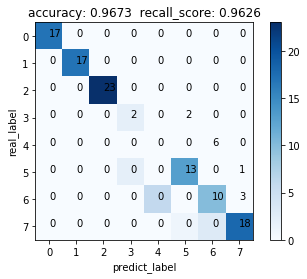

In [89]:
# 预测数据，predict之后的预测结果集
guess = pred_y.numpy()
# 真实结果集
fact = y_test.numpy()
# 类别
classes = list(set(fact))
# 排序，准确对上分类结果
classes.sort()
# 对比，得到混淆矩阵
confusion = confusion_matrix(guess, fact)
# 热度图，后面是指定的颜色块，gray也可以，gray_x反色也可以
plt.imshow(confusion, cmap=plt.cm.Blues)
# 这个东西就要注意了
# ticks 这个是坐标轴上的坐标点
# label 这个是坐标轴的注释说明
indices = range(len(confusion))
# 坐标位置放入
# 第一个是迭代对象，表示坐标的顺序
# 第二个是坐标显示的数值的数组，第一个表示的其实就是坐标显示数字数组的index，但是记住必须是迭代对象
plt.xticks(indices, classes)
plt.yticks(indices, classes)
# 热度显示仪？就是旁边的那个验孕棒啦
plt.colorbar()
# 就是坐标轴含义说明了
plt.xlabel('predict_label')
plt.ylabel('real_label')
# 显示数据，直观些
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.title('accuracy: 0.9673  recall_score: 0.9626')
#plt.savefig('CNNfull_results.tif', dpi = 400)
plt.show()


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
print(accuracy_score(fact,guess),recall_score(fact, guess,average='macro'))

0.9678362573099415 0.9626399744046803
